In [2]:
sys.path.insert(0, './common')

import sys
import cartpole
import a2c_model

In [3]:
env_path = 'velocity/Wave'

In [4]:
env = cartpole.CartPoleEnv()

CARTPOLE environment created.


In [11]:
hidden_layer = 50
model = a2c_model.A2C(4, 2, hidden_layer, lr=0.001)
save_path = './results/cartpole/a2c-dualhead'
model.set_model_save_path(save_path)

In [4]:
model.load_model()

Model loaded
Training history loaded


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


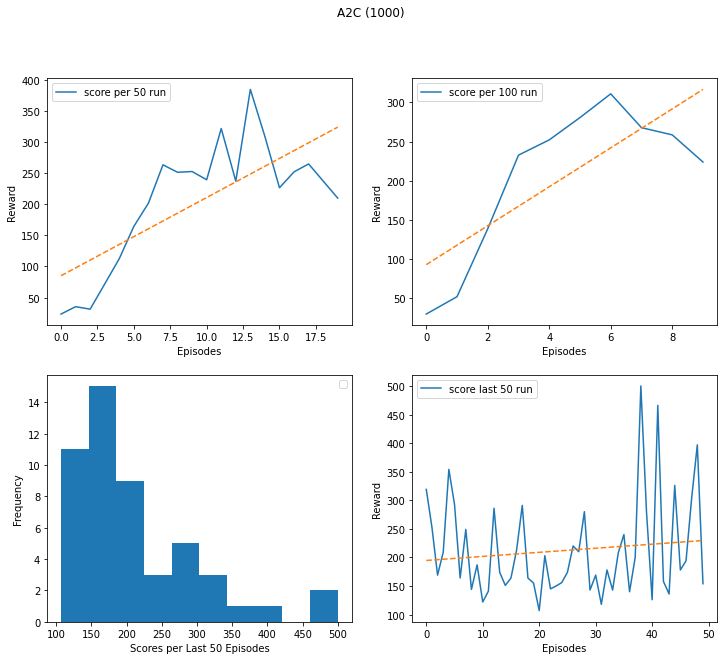

EPOCH: 999, total reward: 154.0, timestep: 154


In [12]:
model.set_train_params(max_step=500, plot_smooth=50)
model.train(env, 1000, show_plot=True)

In [7]:
model.save_model()

Model saved
Training history saved


In [3]:
import saver
saver.save_wave_model(hidden_layer, f'{save_path}/actor.pth', f'{save_path}/model.onnx')

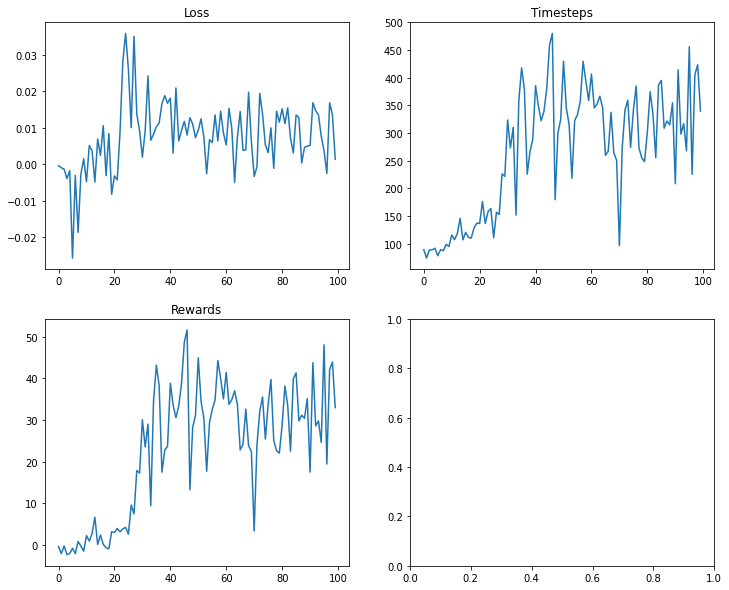

In [8]:
model.plot_train_memory(smooth=100)

In [6]:
env = wave.WaveEnv(env_path, 20)
model.test(env)

WAVE environment created.


(985.8043099213392, 8106)

In [5]:
model.test_avg(lambda time_scale: wave.WaveEnv(env_path, time_scale), 10, 40)

WAVE environment created.
TRY 1: 27.578163803787902, 295
WAVE environment created.
TRY 2: 113.29353512567468, 1048
WAVE environment created.
TRY 3: -7.392701272619888, 40
WAVE environment created.
TRY 4: 27.578162788646296, 295
WAVE environment created.
TRY 5: 143.58335070242174, 1131
WAVE environment created.
TRY 6: 117.58527275850065, 1047
WAVE environment created.
TRY 7: 164.5931766491849, 1382
WAVE environment created.
TRY 8: 44.004736255155876, 460
WAVE environment created.
TRY 9: 62.128610032843426, 565
WAVE environment created.
TRY 10: 109.57957596075721, 925


(80.25318828043528, 718.8)

In [4]:
env.close()

In [8]:

inds = np.random.permutation(500)
batches = inds[:len(inds) // 80 * 80].reshape(-1, 80)

In [9]:
batches

array([[277, 319, 394,  47, 204, 185, 113,  10, 443,  80, 352, 254, 239,
        364, 260, 301, 282, 145, 271, 306, 214, 133, 385, 416,  57, 376,
        322, 128, 456, 353,  61, 356,  76, 194, 121, 131, 226, 499, 390,
        357, 405, 370, 325, 399, 360, 268, 165, 421,  17, 191, 498, 422,
        431,  27, 346, 274, 203, 395, 496, 481, 436, 438, 471, 115, 332,
        273, 340, 105, 316, 157, 114,  39,  53, 304, 119, 417, 293,  71,
        116, 241],
       [397,  96,  29, 492, 342, 391, 412, 246, 270, 473, 207, 143, 393,
        497, 425, 341, 377, 109, 138, 329, 464, 233, 135, 103,  91, 186,
        485, 170, 283, 235, 211, 347, 100, 278, 363, 379, 312, 139,  86,
        365,  28,  92,  36, 151, 454, 213,  69, 173, 127, 187, 381, 487,
         75, 289, 403,  32, 258, 261, 231, 466,  41, 102,  24,  34, 215,
          3,  95, 420, 237, 372, 387, 162,  60,  89,  65, 424, 444, 404,
         78, 224],
       [154, 300,  48,   0,  50, 275, 218, 447, 317, 392, 479, 262, 311,
        159, 

In [3]:
import torch
import numpy as np

def random_sample(inds, minibatch_size):
    inds = np.random.permutation(inds)
    print(inds)
    batches = inds[:len(inds) // minibatch_size * minibatch_size].reshape(-1, minibatch_size)
    for batch in batches:
        yield torch.from_numpy(batch).long()
    r = len(inds) % minibatch_size
    if r:
        yield torch.from_numpy(inds[-r:]).long()

sampler = random_sample(500, 80)
for i, inds in enumerate(sampler):
    print(inds, i)

[443 479 438 497 221 488  49 393 288 323 315 366 154 219 142 150 334 416
 418 252 457 277 237  50 241 226  74  39 439 350  48  99  41  18 390  89
  44 164 420 396 368  14 363 124 442 177 214 236 317  65 354  94 373 304
 351 336 210 481 381 385 487 318 480 432 147 139  98 174 498 205 283 406
  75  97   2 441 472 279 297 376 455 478 423 477 398 199 127 292 433 155
 159  28 394 153 402 436 202 105 110 101 227 254 357 146  29 435 326 384
  91 369  92 449 301 370 256 365 184 208 397 230 243 123 440  45 387 172
 486 425  67 228 453 156 267 111 470  85 335 302 428 132 136 465 149  10
 137 260 285 161 270  90 374 333 239 320 134 103  21 240 231 281  47 424
 411 464 291 454 340 274  79 489 401 347  12  57 296 286 102 410 186 118
 295 196 469 417 378 108 175 404 415  56 361  82 229 463 466 451 160  80
 491 126 461 120 244 119   3 104 187 206 341 298 278 444 194  88  42 421
 422  62  33 364 375 294 215 261  15  25 371 180 388 181 377 392 310 293
 372 170 224 141 460 135  31 168  37 426 492   5 23